# Similitud de vectores

Podemos medir la similitud entre dos vectores utilizando la métrica de similitud del coseno.


In [1]:
# Cargar vectores de sustantivos mas usados
import json
    
with open('embeddings/sustantivos_text-embedding-ada-002.json') as f:
    vectors_ada2 = json.load(f)

with open('embeddings/sustantivos_text-embedding-3-small-1536.json') as f:
    vectors_emb3 = json.load(f)


In [2]:
def cosine_similarity(v1, v2):

  dot_product = sum(
    [a * b for a, b in zip(v1, v2)])
  
  magnitude = (
    sum([a**2 for a in v1]) *
    sum([a**2 for a in v2])) ** 0.5

  return dot_product / magnitude

In [3]:
cosine_similarity(vectors_emb3['perro'], vectors_emb3['gato'])

0.5015692899668971

## Palabras más similares
Podemos encontrar las palabras más similares a una palabra dada utilizando la métrica de similitud del coseno.

In [4]:
import pandas as pd

def most_similar(word: str, vectors: dict) -> list[list]:
    """Devuelve las 10 palabras más similares y sus similitudes respecto a la palabra dada"""
    word_vector = vectors[word]
    similarities = {w: cosine_similarity(word_vector, vector) for w, vector in vectors.items()}
    most_similar_words = sorted(similarities, key=similarities.get, reverse=True)
    return pd.DataFrame([(word, similarities[word]) for word in most_similar_words[:10]], columns=['palabra', 'similitud'])


In [5]:
word = 'perro'
most_similar(word, vectors_ada2)

,palabra,similitud
0,perro,1.000000
1,gato,0.893870
2,cerdo,0.880570
3,pájaro,0.880153
4,humano,0.876163
5,caballo,0.870435
6,ciervo,0.869660
7,bebé,0.868065
8,hombre,0.867042
9,niño,0.866566


In [6]:
most_similar(word, vectors_emb3)

,palabra,similitud
0,perro,1.000000
1,gato,0.501569
2,poroto,0.481004
3,ciervo,0.480089
4,pera,0.473902
5,criatura,0.467084
6,conejo,0.461022
7,cerdo,0.446852
8,caballo,0.446487
9,policía,0.438895


## Visualizaciones de espacio de similitud
Podemos visualizar los vectores de palabras en un espacio 2D utilizando técnicas de reducción de dimensionalidad como el PCA (Principal Components Analysis). Esto nos permite observar las relaciones entre las palabras y cómo se agrupan. _Ten en cuenta que la reducción de dimensionalidad es un proceso que conlleva mucha pérdida de información_

In [7]:
import numpy as np
from sklearn.decomposition import PCA


def perform_pca(vectors: dict):
    """Realiza PCA en los vectores de palabras y devuelve los vectores transformados mediante PCA"""
    X = np.array(list(vectors.values()))
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)
    X_pca = {list(vectors.keys())[i]: X_pca[i] for i in range(len(vectors))}
    return X_pca


vectors_ada2_pca = perform_pca(vectors_ada2)
vectors_emb3_pca = perform_pca(vectors_emb3)

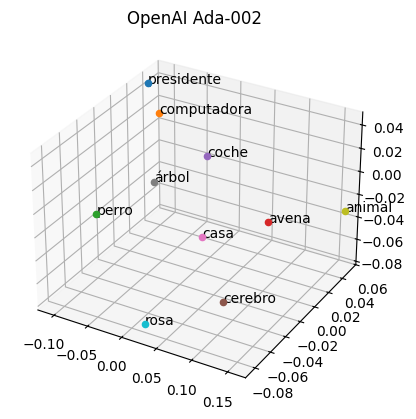

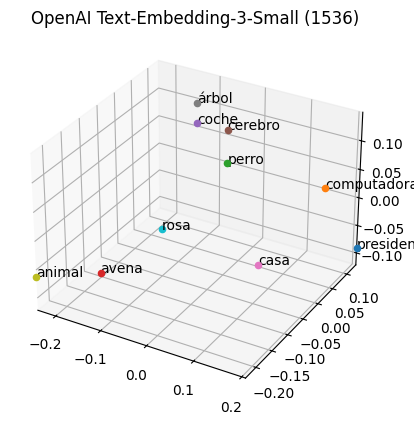

In [8]:
import matplotlib.pyplot as plt

def render_vectors_3d(vectors: dict, title: str):
    """Renderiza vectores 3D (key: [,,,]) en un gráfico 3D"""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Grafica los vectores como puntos
    for key, vector in vectors.items():
        ax.scatter(vector[0], vector[1], vector[2])
        ax.text(vector[0], vector[1], vector[2], key)

    # calular el max y min valor para cada dimension
    min_x = min(v[0] for v in vectors.values())
    max_x = max(v[0] for v in vectors.values())
    min_y = min(v[1] for v in vectors.values())
    max_y = max(v[1] for v in vectors.values())
    min_z = min(v[2] for v in vectors.values())
    max_z = max(v[2] for v in vectors.values())
    ax.set_xlim([min_x, max_x])
    ax.set_ylim([min_y, max_y])
    ax.set_zlim([min_z, max_z])
    ax.set_title(title)
    plt.show()


# obten un subset de vectores para plotting
words = ['presidente', 'computadora', 'perro', 'avena', 'coche', 'cerebro', 'casa', 'árbol', 'animal', 'rosa']
word_pca_vectors_ada2 = {word: vectors_ada2_pca[word] for word in words}
word_pca_vectors_emb3 = {word: vectors_emb3_pca[word] for word in words}

# grafica los vectores
render_vectors_3d(word_pca_vectors_ada2, 'OpenAI Ada-002')
render_vectors_3d(word_pca_vectors_emb3, 'OpenAI Text-Embedding-3-Small (1536)')

## Rangos de similitud
Cada modelo de embeddings tiene un rango diferente de valores de similitud, por lo que no se debe asumir que una similitud de 0.5 en un modelo es la misma que una similitud de 0.5 en otro modelo. Siempre verifica el rango de valores de similitud para el modelo que estás utilizando.

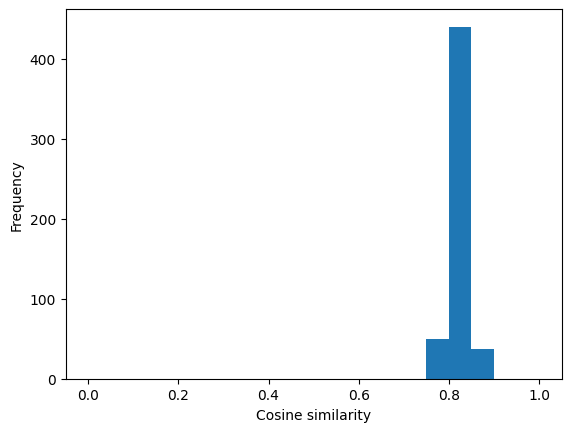

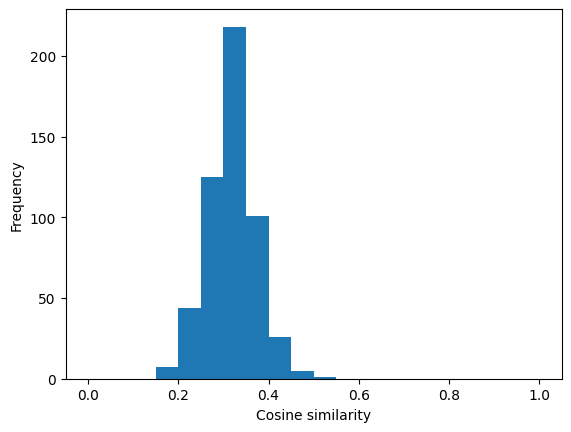

In [9]:
def cosine_similarity_histogram(word: str, vectors: dict):
    """Grafica un histograma de las similitudes del coseno de la palabra con todas las demás palabras"""
    word_vector = vectors[word]
    similarities = [cosine_similarity(word_vector, vectors[w]) for w in vectors if w != word]
    plt.hist(similarities, bins=20, range=(0, 1))
    plt.xlabel('Cosine similarity')
    plt.ylabel('Frequency')
    plt.show()

word = 'perro'
cosine_similarity_histogram(word, vectors_ada2)
cosine_similarity_histogram(word, vectors_emb3)

## Explora vectores multi palabras

In [10]:
import json
with open('embeddings/peliculas_text-embedding-3-small-1536.json') as f:
    movies = json.load(f)

In [13]:
# Encuentra las 10 películas más similares a una película objetivo
target_movie = movies['El Rey León']

# Calcula la similitud del coseno entre la película objetivo y todas las demás películas
similarities = [cosine_similarity(target_movie, movie) for movie in movies.values()]

most_similar = sorted(range(len(similarities)), key=lambda i: similarities[i], reverse=True)[1:11]

similar_movies = [(list(movies.keys())[i], round(similarities[i], 3)) for i in most_similar]
pd.DataFrame(similar_movies, columns=['película', 'similaridad'])

,película,similaridad
0,El Libro de la selva,0.503
1,La Bella y la Bestia,0.494
2,Cenicienta,0.457
3,Encanto,0.454
4,La gran película de Piglet,0.450
5,Aladdín,0.449
6,Frozen: El reino de hielo,0.445
7,"Merlín, el encantador",0.436
8,El Jorobado de Notre Dame,0.422
9,Dumbo,0.420


In [14]:
# encuentra las 10 menos similares
least_similar = sorted(range(len(similarities)), key=lambda i: similarities[i])[1:11]
similar_movies = [(list(movies.keys())[i], round(similarities[i], 3)) for i in least_similar]
pd.DataFrame(similar_movies, columns=['película', 'similaridad'])

,película,similaridad
0,Ralph Rompe Internet,0.174
1,Mary Poppins,0.196
2,Bolt,0.201
3,Vaiana,0.228
4,La bruja novata,0.233
5,Tiempo de melodía,0.244
6,Zafarrancho en el rancho,0.253
7,Pocahontas,0.254
8,Zootrópolis,0.267
9,La leyenda de Sleepy Hollow y el Señor Sapo,0.273


## Recursos

* [Embedding projector](https://projector.tensorflow.org/)
* [Why are Cosine Similarities of Text embeddings almost always positive?](https://vaibhavgarg1982.medium.com/why-are-cosine-similarities-of-text-embeddings-almost-always-positive-6bd31eaee4d5)
* [Expected Angular Differences in Embedding Random Text?](https://community.openai.com/t/expected-angular-differences-in-embedding-random-text/28577)
* [Embeddings: What they are and why they matter](https://simonwillison.net/2023/Oct/23/embeddings/)
